In [1]:
import os

from skimage.filters.rank import median
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from scipy.ndimage.filters import convolve
from skimage.filters import threshold_otsu
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import threshold_multiotsu
import skimage
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
import cv2

In [2]:
matrices_bc = []

dir_path_bc = r"D:\Documents\Курсова файли\needed_files\BC\404"
entries_control = os.listdir(dir_path_bc)

i = 0
for file_name in entries_control:
    matrices_bc.append([])
    with open(dir_path_bc + fr"\{file_name}") as f:
        lines = f.readlines()
        for line in lines:
            t = np.array([int(float(x)) for x in line.split()], dtype=np.uint8)
            matrices_bc[i].append(t)
    i += 1 

In [1]:
I = np.array(matrices_bc[0][:-1], dtype=np.uint8)

NameError: name 'np' is not defined

In [4]:
np.std(I)

11.502126202212827

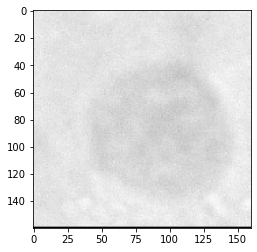

In [5]:
plt.imshow(I,cmap='gray',label="(0,1)")

In [6]:
I_new = median(I, disk(1))

In [7]:
print(disk(2))

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


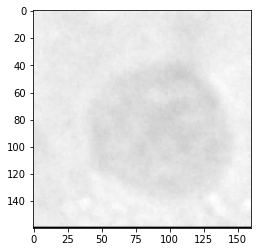

In [8]:
plt.imshow(I_new, cmap="gray")

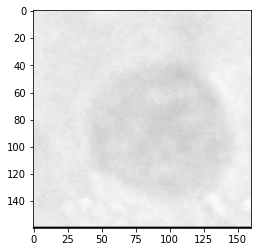

In [9]:
from skimage.filters.rank import mean_bilateral

bilat = mean_bilateral(I.astype(np.uint16), disk(1), s0=10, s1=10)
plt.imshow(bilat, cmap="gray")

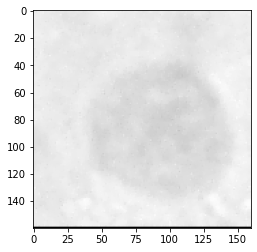

In [10]:
denoised = denoise_tv_chambolle(I, weight=0.005,eps=0.001)
plt.imshow(denoised, cmap="gray")

C:\Users\Vlad\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3441: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


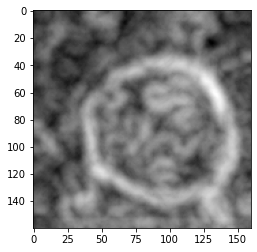

In [11]:
plt.imshow(entropy(denoised, disk(7)), cmap="gray")

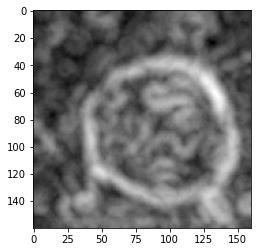

In [12]:
bilat_n = entropy(bilat, disk(7))
plt.imshow(bilat_n, cmap="gray")

In [13]:
#plt.imshow(new_matr,cmap='gray_r', vmin=new_matr.min(), vmax=new_matr.max())

## Sobel filter (bad)

In [14]:
# sacrificial_bridge = np.zeros((50,50))
# sacrificial_bridge[22:30, 0:21] = 1
# sacrificial_bridge[22:30, 30:] = 1
# sacrificial_bridge[25:27, 21:30] = 1
# plt.imshow(sacrificial_bridge, cmap='gray')
# plt.show()

In [15]:
# # Build Sobel filter for the x dimension
# s_x = np.array([[1, 0, -1],
#                 [2, 0, -2],
#                 [1, 0, -1]])
# # Build a Sobel filter for the y dimension
# s_y = s_x.T # transposes the matrix

In [16]:
# res_x = convolve(sacrificial_bridge, s_x)
# res_y = convolve(sacrificial_bridge, s_y)

# B = np.sqrt(res_x**2 + res_y**2)
# plt.imshow(B, cmap="gray")

In [17]:
# res_x = convolve(I, s_x)
# res_y = convolve(I, s_y)

# # square the responses, to capture both sides of each edge
# G = np.sqrt(res_x**2 + res_y**2)
# plt.imshow(G)

## Gabor filter $ g(x, y ; \lambda, \theta, \psi, \sigma, \gamma)=\exp \left(-\frac{x^{\prime 2}+\gamma^{2} y^{\prime 2}}{2 \sigma^{2}}\right) \exp \left(i\left(2 \pi \frac{x^{\prime}}{\lambda}+\psi\right)\right) $

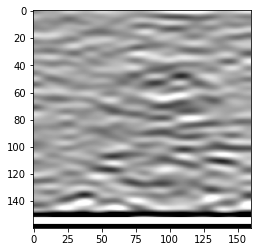

In [18]:
ksize=45
theta=np.pi/2
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(I, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap='gray')

## Entropy

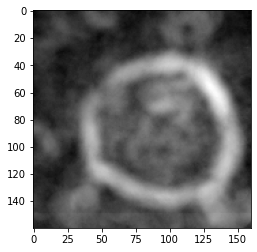

In [19]:
entropy_img = entropy(I, disk(11))
plt.imshow(entropy_img, cmap="gray")

In [20]:
entropy_max  = np.amax(entropy_img)
entropy_min = np.amin(entropy_img)
print(entropy_max)

4.793897129615557


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   4.,   1.,
          3.,   2.,   2.,   4.,   1.,   2.,   7.,   2.,   6.,   6.,   6.,
          7.,  12.,   5.,  14.,  16.,  13.,  18.,  14.,  15.,  16.,  22.,
         23.,  22.,  32.,  34.,  29.,  31.,  40.,  46.,  38.,  51.,  49.,
         54.,  49.,  46.,  53.,  54.,  60.,  78.,  58.,  72.,  65.,  64.,
         77.,  63.,  71.,  73.,  82.,  89.,  95., 100.,  91.,  86.,  97.,
         95., 117.,  97., 110., 106., 113., 118., 107., 106.,  97., 107.,
         98., 118.,  92.,  99., 114., 124., 112., 101., 102., 101., 116.,
        124., 130., 125., 106., 115., 131., 109., 143., 123., 108., 116.,
        113., 107., 131., 119., 115., 114., 121., 123.,  88., 104., 104.,
        113., 115.,  98., 112., 100.,  90., 107.,  95., 114.,  90.,  94.,
        102., 135., 120., 117., 101.,  92., 112., 101.,  93.,  99., 107.,
        115., 133., 111., 113.,  97., 103., 106., 122., 111.,  99., 101.,
        110., 101., 105., 104., 124., 

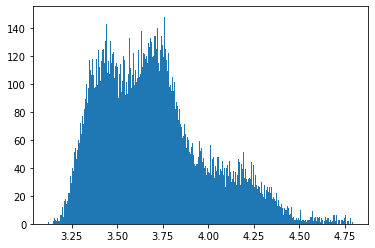

In [21]:
plt.hist(entropy_img.flat, bins=500) 

In [22]:
?threshold_otsu

Signature: threshold_otsu(image, nbins=256)
Docstring:
Return threshold value based on Otsu's method.

Parameters
----------
image : (N, M) ndarray
    Grayscale input image.
nbins : int, optional
    Number of bins used to calculate histogram. This value is ignored for
    integer arrays.

Returns
-------
threshold : float
    Upper threshold value. All pixels with an intensity higher than
    this value are assumed to be foreground.

Raises
------
ValueError
     If ``image`` only contains a single grayscale value.

References
----------
.. [1] Wikipedia, https://en.wikipedia.org/wiki/Otsu's_Method

Examples
--------
>>> from skimage.data import camera
>>> image = camera()
>>> thresh = threshold_otsu(image)
>>> binary = image <= thresh

Notes
-----
The input image must be grayscale.
File:      c:\users\vlad\anaconda3\lib\site-packages\skimage\filters\thresholding.py
Type:      function


In [23]:
# thresh = threshold_otsu(entropy_img, nbins=500)

# #Now let us binarize the entropy image 
# binary = entropy_img <= thresh
# plt.imshow(binary)

In [24]:
# binary.shape
# ?np.reshape

[3.5852522  3.96974505]
2 0
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


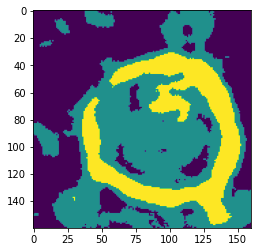

In [25]:
thresholds = threshold_multiotsu(entropy_img, classes=3, nbins=500)
print(thresholds)
regions = np.digitize(entropy_img, bins=thresholds)
print(regions.max(), regions.min())
seg1 = (regions == 0)
seg2 = (regions == 1)
seg3 = (regions == 2)
print(seg3)
plt.imshow(regions)

In [26]:
def p(i,j, matr, d):
    n_rows, n_cols = matr.shape
    dx, dy = d
    
    res = 0
    for x in range(n_rows):
        for y in range(n_cols):
            props1 = [x + dx  < n_rows, y + dy < n_cols]
            
            if all(props1):
                if matr[x][y] == i and matr[x + dx][y + dy] == j:
                    res += 1
       
    return res

def coincidence_matr(image, d):
    """
    d -- (dx, dy) vector
    image -- N x M matrix
    """
    
    res_matr = np.zeros((256, 256))
    vmin, vmax = image.min(), image.max()
    
    # it actually makes sense to look only at
    # rectangle (vmnin x vmax) and make the least
    # equals zero
    for i in range(vmin, vmax):
        for j in range(vmin, vmax):
            res_matr[i, j] = p(i, j, image, d)
            
            
    return res_matr


In [ ]:
%%time
coic_entropy = coincidence_matr(I, (0,1))

In [ ]:


def t_(x, a, b):
    """[a,b] -> [0, 255]"""
    assert b > a
    m = 255 / (b - a)
    d = -255 * a / (b - a)
    
    return m * x + d

a_min = coic_entropy.min()
b_max = coic_entropy.max()
print(a_min,b_max)
coic_entropy = t_(coic_entropy,a_min, b_max)
bad = coic_entropy < (0.05 * b_max)
print(coic_entropy.min(), coic_entropy.max())

coic_entropy[bad] = 0

In [ ]:
print(coic_entropy)
plt.figure(figsize=(10,10))
# plt.axhline(100)
# plt.axhline(150)
# plt.axvline(100)
# plt.axvline(150)

int_image = coic_entropy.astype(np.uint8)
print(int_image)
np.savetxt('test1.out', int_image, delimiter=',') 
original_array = np.loadtxt("test1.out",delimiter=',').reshape(256, 256)
plt.imshow(original_array[100:150,100:150], cmap="gray_r")
#plt.savefig(fname="c.png")


In [ ]:
nonzero = (coic_entropy != 0)
plt.hist(coic_entropy[nonzero],bins=200)
#plt.hist(coic_entropy[nonzero].flat, bins=100) 

In [ ]:
thresh_hold = threshold_otsu(coic_entropy[nonzero],nbins=200)


new_img = np.zeros((256, 256))
n,m = new_img.shape

for i in range(n):
    for j in range(m):
        if coic_entropy[i,j] > 0:
            if coic_entropy[i,j] > thresh_hold:
                new_img[i,j] = 1
            else:
                new_img[i,j] = 3
                
plt.imshow(new_img[110:145,110:145])

In [ ]:
# энтропия фигня тут кнчн
en_coic = entropy(coic_entropy[110:145,110:145].astype(np.uint8), disk(2))
thresh_hold = threshold_otsu(en_coic,nbins=200)

plt.imshow(en_coic,cmap="gray_r")

# new_img = np.zeros((256, 256))
# n,m = new_img.shape

# for i in range(n):
#     for j in range(m):
#         if coic_entropy[i,j] > 0:
#             if coic_entropy[i,j] > thresh_hold:
#                 new_img[i,j] = 1
#             else:
#                 new_img[i,j] = 3
# plt.imshow(en_coic[100:150,100:150], cmap="gray_r")

In [ ]:
print(I.min(), I.max())
plt.imshow(I)

In [ ]:
new_image = np.zeros((159, 160, 3))
new_image[seg1] = (150,0,0)
new_image[seg2] = (0,150,0)
new_image[seg3] = (255,255,255)
plt.imshow(new_image.astype(np.uint8))

In [ ]:
matrices_control = []

dir_path = r"D:\Documents\Курсова файли\needed_files\Control\2"
entries_control = os.listdir(dir_path)

i = 0
for file_name in entries_control:
    matrices_control.append([])
    with open(dir_path + fr"\{file_name}") as f:
        lines = f.readlines()
        for line in lines:
            t = np.array([int(float(x)) for x in line.split()], dtype=np.uint8)
            matrices_control[i].append(t)
    i += 1

In [ ]:
I_control = np.array(matrices_control[1][:-1])

plt.imshow(I_control, cmap="gray")

In [ ]:
control_coic = coincidence_matr(I_control, (0,1))

In [ ]:
plt.imshow(control_coic, cmap="gray_r")

In [ ]:
good_contorcontrol_coic = control_coic > (0.05 * control_coic.max())
print(m, good)

rows, cols = good_contorcontrol_coic.shape
for i in range(rows):
    for j in range(cols):
        if not good_contorcontrol_coic[i,j]:
            control_coic[i,j] = 0

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.vstack((control_coic, np.full(256, 255))), cmap="gray_r")

In [ ]:
I_control_med = median(I_control, disk(3))

plt.imshow(I_control_med, cmap="gray")

In [ ]:
entropy_img_control = entropy(I_control_med, disk(12))
plt.imshow(entropy_img_control[100:150,100:150], cmap="gray")

In [ ]:
thresholds_control = threshold_multiotsu(entropy_img_control, classes=3, nbins=500)

regions_control = np.digitize(entropy_img_control, bins=thresholds)
plt.imshow(regions_control)